In [4]:
import pandas as pd

#READ THE CSV FILE
file_path = 'spotify.csv' 
df = pd.read_csv(file_path)

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', format='%Y-%m-%d')

df = df.dropna(subset=['track_album_release_date'])

df_2017 = df[df['track_album_release_date'].dt.year == 2017]

genre_averages_2017 = df_2017.groupby('playlist_genre').agg({
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': lambda x: x.mean() / 60000  
}).reset_index()

output_file_path = 'genre_averages_2017.csv' 
genre_averages_2017.to_csv(output_file_path, index=False)

#PRINT OUT THE RESULT
print(f'Results saved to {output_file_path}')



Results saved to genre_averages_2017.csv


In [7]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
df_2017 = df[df['track_album_release_date'].dt.year == 2017]

genre_averages_2017 = df_2017.groupby('playlist_genre').agg({
    'loudness': 'mean',
    'mode': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': lambda x: x.mean() / 60000  # convert milliseconds to minutes
}).reset_index()

# Save the findings to a new CSV file
output_file_path = 'genre_averages_2017.csv'
genre_averages_2017.to_csv(output_file_path, index=False)

output_file_path


'genre_averages_2017.csv'

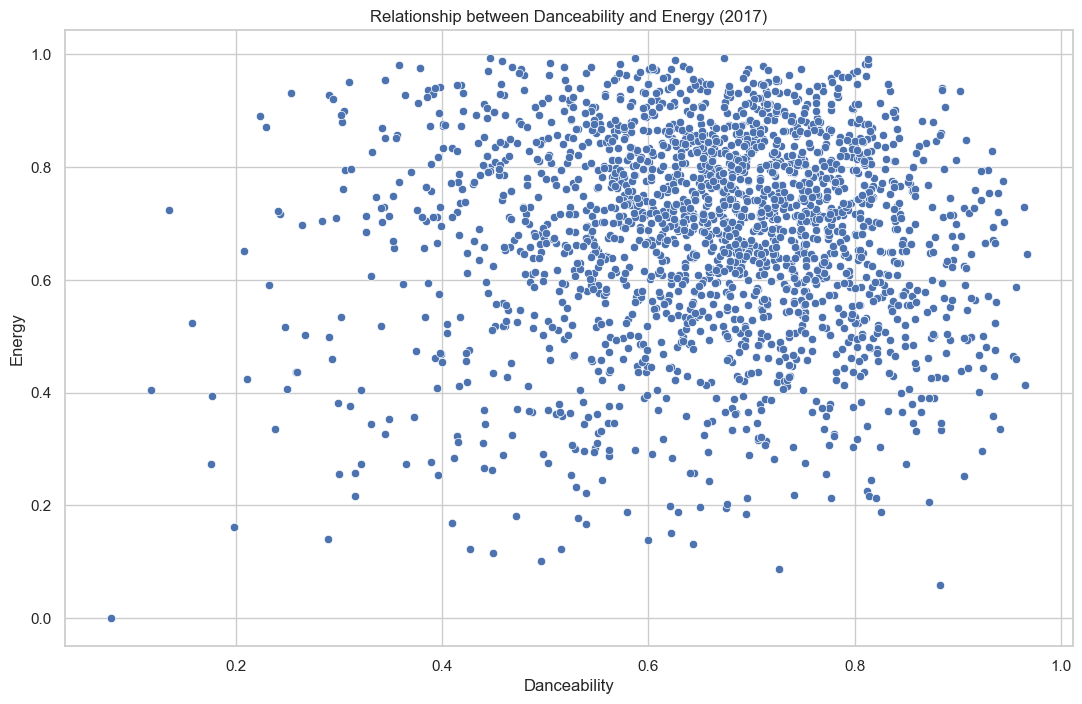

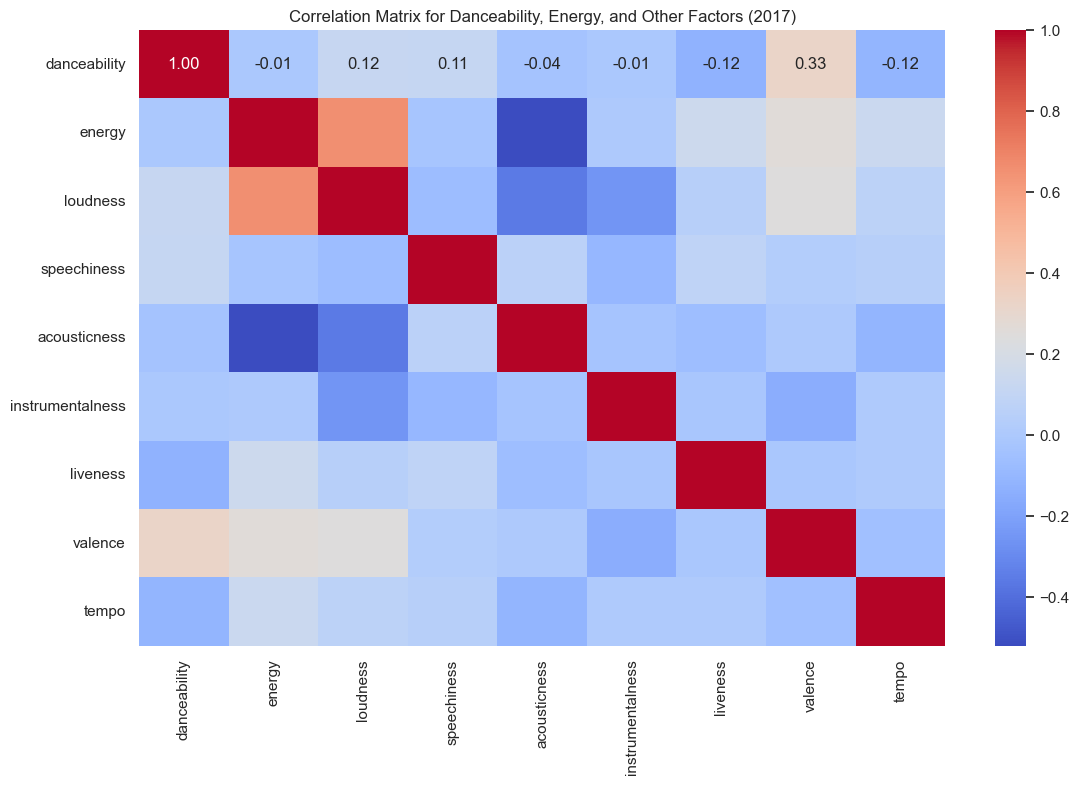

,danceability,energy
danceability,1.000000,-0.010399
energy,-0.010399,1.000000
loudness,0.116584,0.659693
speechiness,0.110413,-0.028423
acousticness,-0.037089,-0.522086
instrumentalness,-0.007956,0.002908
liveness,-0.124700,0.147612
valence,0.326548,0.259415
tempo,-0.117292,0.134594


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

#PLOT DISPLAY
plt.figure(figsize=(13, 8))
sns.scatterplot(data=df_2017, x='danceability', y='energy')
plt.title('Relationship between Danceability and Energy (2017)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

correlation_matrix = df_2017[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                              'instrumentalness', 'liveness', 'valence', 'tempo']].corr()

# Display plt
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Danceability, Energy, and Other Factors (2017)')
plt.show()

correlation_matrix[['danceability', 'energy']]
